# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:** 

* Machine Learning task: Classification model 
* Target variable: Loan_Status 
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant
* **CoapplicantIncome:** Income of the co-applicant
* **LoanAmount:** Loan amount requested
* **Loan_Amount_Term:** Term of the loan
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [83]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [84]:
# check the number of rows and observations
df.info()

print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    int64  
 11  Property_Area      614 non-null    object 
 12  Loan_Approved      614 non-null    int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 62.5+ KB
(614, 13)


<Axes: xlabel='Loan_Approved', ylabel='count'>

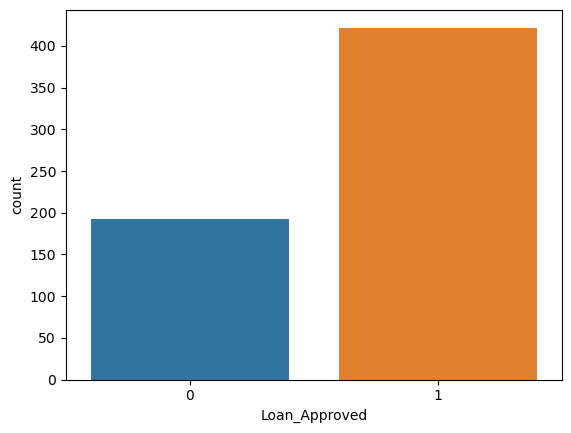

In [85]:
# How many application were approved and how many were denied? Plot a count plot
import seaborn as sns

sns.countplot(df, x="Loan_Approved")
#sns.barplot(df, x="Loan_Approved", y="count(Loan_ID").set(title="approved/denied")

### Data Prep

In [86]:
# drop 'Loan_ID' variable from the data. We won't need it.
df.drop(['Loan_ID'], axis=1, inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [87]:
# Create dummy variables for all 'object' type variables except 'Loan_Status'

#pd.get_dummies(df,)

#obj_columns=df.select_dfypes(include=['object']).columns.difference(['Loan_Approved'])
object_columns = df.select_dtypes(include=['object']).columns
object_columns = object_columns[(object_columns != 'Loan_Approved')]

df = pd.get_dummies(df, columns=object_columns)


In [88]:
# saving this procewssed dataset
df.to_csv('Processed_Credit_Dataset.csv', index=None)

### Data Partition

In [89]:
# Seperate the input features and target variable
X = df.drop(['Loan_Approved'], axis=1)  
y = df['Loan_Approved']

# Display the input features and target variable
print("Input Features (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Input Features (X):
   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         128               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0               1              0            1           1            0   
1               1              0            1           0            1   
2               1              0            1           0            1   
3               1              0            1           0            1   
4               1              0            1           1            0   

   Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
0             1             0             0   

In [90]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split

# Assuming X and y are your input features and target variable
# X and y should be defined from the previous example

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (491, 20)
y_train shape: (491,)
X_test shape: (123, 20)
y_test shape: (123,)


In [91]:
# check the split if interested
print("Training set:")
print("X_train:")
print(X_train.head())
print("\ny_train:")
print(y_train.head())

print("\nTesting set:")
print("X_test:")
print(X_test.head())
print("\ny_test:")
print(y_test.head())

Training set:
X_train:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
83              6000             2250.0         265               360   
90              2958             2900.0         131               360   
227             6250             1695.0         210               360   
482             2083             3150.0         128               360   
464             4166                0.0          98               360   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
83                1              0            1           0            1   
90                1              0            1           0            1   
227               1              0            1           0            1   
482               1              0            1           0            1   
464               0              0            1           1            0   

     Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
83              1

# **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [92]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [93]:
# Fit the model on the data
model = LogisticRegression(random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [94]:
# From sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix


# Assuming X_test and y_test are your testing data
# You should have these from the previous example

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and display the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the testing set: {accuracy:.2f}")

Accuracy on the testing set: 0.79


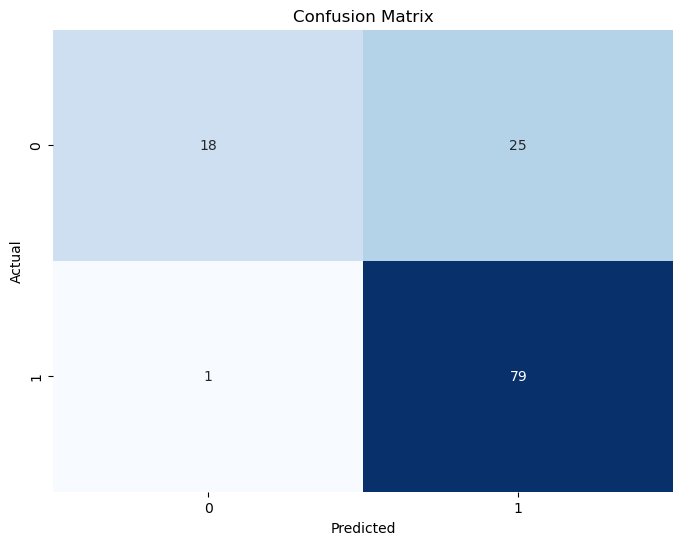

In [95]:
# Print the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [96]:
# check how probabilities are assigned
probabilities = model.predict_proba(X_test)

# Display the first few rows of probability estimates
print("Probabilities:")
print(probabilities[:5])

Probabilities:
[[0.09538526 0.90461474]
 [0.07911664 0.92088336]
 [0.21407187 0.78592813]
 [0.24718486 0.75281514]
 [0.11207467 0.88792533]]


In [98]:
# to change the default threshold and to make it 70% and above
#(pypred[:, 1] >= 0.7).astype(int)
probabilities_positive_class = model.predict_proba(X_test)[:, 1]

# Apply the custom threshold of 0.7
custom_predictions = (probabilities_positive_class >= 0.7).astype(int)

# Display the first few rows of the custom predictions
print("Custom Predictions:")
print(custom_predictions[:5])

Custom Predictions:
[1 1 1 1 1]


## <font color='chocolate'>**2. Random Forest**

In [29]:
# Import RandomForestClassifier 
Import RandomForestClassifier 

In [99]:
# Let's list the tunable hyperparameters for Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the testing set: {accuracy:.2f}")

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on the testing set: 0.79


For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 10

In [100]:
# Fit a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the testing set: {accuracy:.2f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy on the testing set: 0.76

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123

